# Práctica Calificada 2
---
**Predicción de tarifas de taxis**<br>
El objetivo de esta evaluación es construir un modelo de aprendizaje que sea capaz de
predecir la tarifa que cobra un taxi de acuerdo a cierta información de entrada.

* **ID**: cadena que identifica de manera única a cada registro
* **pickup_datetime**: timestamp indicando cuando el viaje a empezado
* **pickup_longitude**: número real indicando la ubicación en **longitud** en donde el viaje
empezó
* **pickup_latitude**: número real indicando la ubicación en **latitud** en donde el viaje
empezó
* **dropoff_longitude**: número real indicando la ubicación en longitud en donde el viaje
terminó
* **dropoff_latitude**: número real indicando la ubicación en latitud en donde el viaje
terminó
* **passenger_count**: número entero indicando el número de pasajeros en el servicio de
taxi
* **fare_amount: número real indicando el costo del taxi. Esta es la variable a predecir**

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<h4>Poblacion</h4>

In [4]:
%%time
df = pd.read_csv("train.csv")

Wall time: 11min 14s


In [191]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+07,5.542386e+07,5.542386e+07,5.542348e+07,5.542348e+07,5.542386e+07
mean,1.134505e+01,-7.250968e+01,3.991979e+01,-7.251121e+01,3.992068e+01,1.685380e+00
std,2.071083e+01,1.284888e+01,9.642353e+00,1.278220e+01,9.633346e+00,1.327664e+00
min,-3.000000e+02,-3.442060e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075265e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076713e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,9.396336e+04,3.457626e+03,3.408790e+03,3.457622e+03,3.537133e+03,2.080000e+02


<h4>Muestra</h4>

In [84]:
%%time
# 1000000 sample
df_s = df.sample(100000)

Wall time: 4min 46s


In [210]:
df_s.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,99999.000000,99999.000000,100000.000000
mean,11.336822,-72.471349,39.895982,-72.495088,39.905861,1.683360
std,9.707742,10.587718,6.423522,10.735315,6.394699,1.306758
min,-8.500000,-83.353842,-74.017740,-736.500000,-74.015572,0.000000
25%,6.000000,-73.992120,40.734982,-73.991362,40.734040,1.000000
50%,8.500000,-73.981845,40.752628,-73.980120,40.753255,1.000000
75%,12.500000,-73.967078,40.767047,-73.963554,40.768178,2.000000
max,238.000000,40.800855,404.666667,40.869710,404.383332,8.000000


In [128]:
df_s.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

<h4>Data Cleaning</h4>

In [208]:
# Se trabajará con la siguiente data
data = df_s[(-180.0 <= df_s["pickup_longitude"]) & (df_s["pickup_longitude"] <= 180.0) &
            (-90.0 <= df_s["pickup_latitude"]) & (df_s["pickup_latitude"] <= 90.0) & 
            (-180.0 <= df_s["dropoff_longitude"]) & (df_s["dropoff_longitude"] <= 180.0) &
            (-90.0 <= df_s["dropoff_latitude"]) & (df_s["dropoff_latitude"] <= 90.0)&
            (2.0 < df_s["fare_amount"]) & (df_s["fare_amount"] < 200)]

In [211]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,99989.000000,99989.000000,99989.000000,99989.000000,99989.000000,99989.000000
mean,11.333317,-72.472663,39.893063,-72.489794,39.902955,1.683395
std,9.659590,10.583328,6.316924,10.523481,6.287746,1.306762
min,2.500000,-83.353842,-74.017740,-83.363788,-74.015572,0.000000
25%,6.000000,-73.992120,40.734982,-73.991362,40.734042,1.000000
50%,8.500000,-73.981846,40.752628,-73.980120,40.753253,1.000000
75%,12.500000,-73.967080,40.767047,-73.963559,40.768177,2.000000
max,180.000000,40.800855,45.883332,40.869710,42.430088,8.000000


In [209]:
data.shape

(99989, 8)

In [ ]:
# Eliminado la columna ID
data.drop(columns='key', inplace=True)

In [205]:
data.sort_values(by='pickup_longitude', ascending=False).tail(20)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
36947869,12.10,2012-08-02 22:25:00 UTC,-74.300123,40.571082,-74.317467,40.570015,1
30934093,12.00,2014-05-11 14:25:32 UTC,-74.340316,40.742868,-74.341773,40.748439,1
44062636,127.00,2013-05-15 02:03:01 UTC,-74.393858,40.642165,-74.393859,40.642198,2
30436806,10.90,2009-09-03 23:33:31 UTC,-74.428520,40.846352,-74.428520,40.846352,2
25188050,180.00,2011-01-16 21:40:50 UTC,-74.430355,40.779322,-74.430355,40.779322,1
10154789,5.30,2009-10-08 20:52:00 UTC,-74.503763,40.230450,-74.569233,40.222762,1
42656639,3.70,2009-04-14 19:13:00 UTC,-74.595330,40.971212,-73.998427,40.745497,1
2182706,10.50,2012-02-10 08:21:00 UTC,-74.618183,40.736468,-74.346303,40.802628,1
5033607,6.10,2010-05-14 20:00:00 UTC,-74.663783,39.665718,-74.683930,39.645470,1
2718190,6.50,2011-02-08 16:04:19 UTC,-74.689831,40.190564,-74.689831,40.190564,1


<AxesSubplot:>

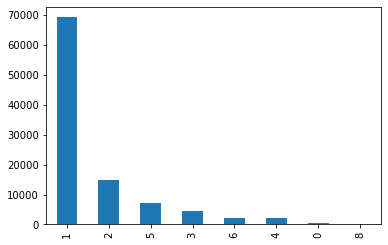

In [206]:
data["passenger_count"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='fare_amount', ylabel='Frequency'>

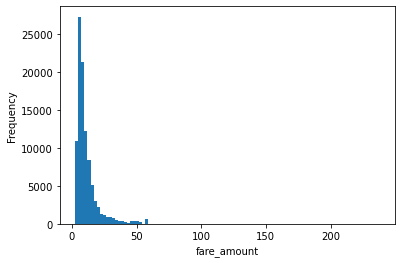

In [207]:
plt.xlabel("fare_amount")
data["fare_amount"].plot.hist(alpha=1, stacked=True, bins=100)

C:\Users\jbardalesr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jbardalesr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

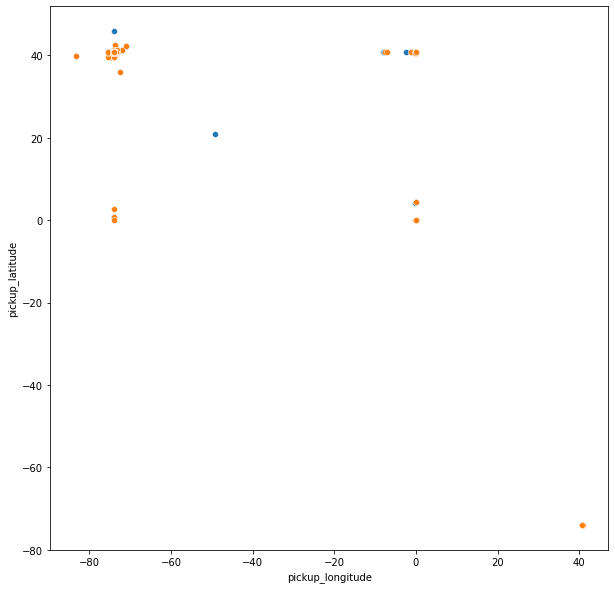

In [123]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data["pickup_longitude"], data["pickup_latitude"])
sns.scatterplot(data["dropoff_longitude"], data["dropoff_latitude"])